# Importing the libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the dataset

In [2]:
dataset = pd.read_excel('DataSet_EU_3k_5k.xlsx')

# Data Preprocessing

We will be using Channel 24.

In [58]:
channel_24_columns = ['Power_24', 'NLI_24', 'ASE_24', 'frequency_24', 'Total Distance(m)', 'No. Spans', 'GSNR_24']
data = dataset[channel_24_columns]

Display the first few rows of the dataset

In [59]:
data.head()

,Power_24,NLI_24,ASE_24,frequency_24,Total Distance(m),No. Spans,GSNR_24
0,0.000007,4.842871e-08,4.864403e-08,192450000000000,690608.0,8,76.723141
1,0.000007,3.885630e-08,5.247437e-08,192450000000000,690608.0,8,79.514276
2,0.000000,0.000000e+00,7.411925e-06,192450000000000,690608.0,8,0.000000
3,0.000000,0.000000e+00,7.423609e-06,192450000000000,690608.0,8,0.000000
4,0.000000,0.000000e+00,7.187909e-06,192450000000000,690608.0,8,0.000000


Checking the data types of columns

In [60]:
data.dtypes

Power_24             float64
NLI_24               float64
ASE_24               float64
frequency_24           int64
Total Distance(m)    float64
No. Spans              int64
GSNR_24              float64
dtype: object

Summary Statistics

In [61]:
data.describe()

,Power_24,NLI_24,ASE_24,frequency_24,Total Distance(m),No. Spans,GSNR_24
count,18000.000000,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,18000.00000,18000.000000
mean,0.000024,6.083256e-07,3.177172e-05,1.924500e+14,1.970755e+06,22.00000,15.672157
std,0.000038,1.071328e-06,4.231358e-05,0.000000e+00,1.023753e+06,11.41668,23.902547
min,0.000000,0.000000e+00,3.796777e-08,1.924500e+14,6.692970e+05,7.00000,0.000000
25%,0.000000,0.000000e+00,3.249564e-06,1.924500e+14,6.906080e+05,8.00000,0.000000
50%,0.000000,0.000000e+00,7.406459e-06,1.924500e+14,2.167932e+06,24.50000,0.000000
75%,0.000019,3.221394e-07,1.000000e-04,1.924500e+14,3.051078e+06,34.00000,17.120952
max,0.000095,3.670818e-06,1.000000e-04,1.924500e+14,3.077685e+06,34.00000,91.353745


Checking for missing values

In [62]:
data.isnull().sum()

Power_24             0
NLI_24               0
ASE_24               0
frequency_24         0
Total Distance(m)    0
No. Spans            0
GSNR_24              0
dtype: int64

Visualizing the data

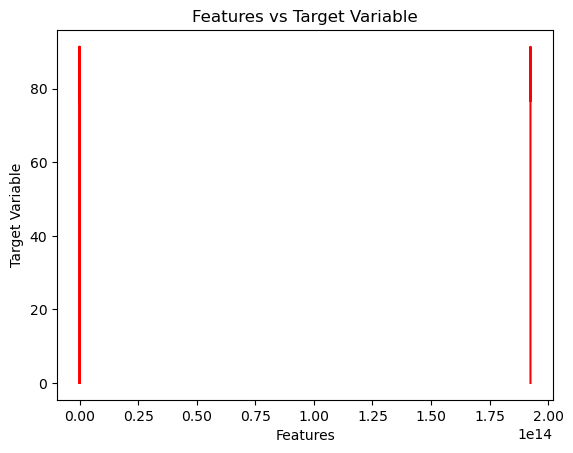

In [63]:
plt.plot(data.iloc[:, :-1].values, data.iloc[:, -1].values, color = 'red')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.title('Features vs Target Variable')
plt.show()

We can clearly see from the plot that our data is non-linear.

# Splitting dataset into training and test set

In [64]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [65]:
print(f'X size = {X.shape}\ny size = {y.shape}')

X size = (18000, 6)
y size = (18000,)


In [66]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [67]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (14400, 6), (14400,)
Validation set shape: (1800, 6), (1800,)
Test set shape: (1800, 6), (1800,)


# Applying feature scaling

In [68]:
sc = StandardScaler()
# X_scaled = sc.fit_transform(X)
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)
X_test_scaled = sc.transform(X_test)

In [69]:
print(f'X_train[0] = {X_train[0]}\nX_train_scaled[0] = {X_train_scaled[0]}')

X_train[0] = [7.33494511e-06 5.39951760e-08 4.64896996e-08 1.92450000e+14
 6.90608000e+05 8.00000000e+00]
X_train_scaled[0] = [-0.43357926 -0.51600236 -0.74863056  0.         -1.24578461 -1.22149915]


In [70]:
print(f'X_val[0] = {X_val[0]}\nX_val_scaled[0] = {X_val_scaled[0]}')

X_val[0] = [0.00000000e+00 0.00000000e+00 1.11321821e-05 1.92450000e+14
 6.69297000e+05 7.00000000e+00]
X_val_scaled[0] = [-0.62644825 -0.5664848  -0.48650759  0.         -1.26658322 -1.30901084]


In [71]:
print(f'X_test[0] = {X_test[0]}\nX_test_scaled[0] = {X_test_scaled[0]}')

X_test[0] = [0.000000e+00 0.000000e+00 1.000000e-04 1.924500e+14 2.660552e+06
 3.000000e+01]
X_test_scaled[0] = [-0.62644825 -0.5664848   1.61478613  0.          0.67679573  0.7037581 ]


# Model Training 

In [26]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout

## Building the model

In [39]:
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', name='input_layer'))
    model.add(Dense(32, activation='relu', name='hidden_layer'))
    model.add(Dense(1, activation='linear', name='output_layer')) 
    return model

model = build_model()

## Compiling the model

In [40]:
model.compile(optimizer='adam', loss='mse', metrics=['mae']) # default learning rate for optimizer (adam) = 0.001

## Summary of the model

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                448       
                                                                 
 hidden_layer (Dense)        (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fitting the model

In [42]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), batch_size=32, epochs=100)

Epoch 1/100
450/450 [==============================] - 3s 3ms/step - loss: 414.1324 - mae: 12.1101 - val_loss: 198.4825 - val_mae: 8.6113
Epoch 2/100
450/450 [==============================] - 1s 2ms/step - loss: 102.1171 - mae: 6.2196 - val_loss: 32.9811 - val_mae: 3.3571
Epoch 3/100
450/450 [==============================] - 1s 2ms/step - loss: 20.4123 - mae: 2.5017 - val_loss: 14.3908 - val_mae: 1.9104
Epoch 4/100
450/450 [==============================] - 2s 4ms/step - loss: 13.2946 - mae: 1.8823 - val_loss: 11.3786 - val_mae: 1.6807
Epoch 5/100
450/450 [==============================] - 1s 3ms/step - loss: 11.3493 - mae: 1.7231 - val_loss: 10.3341 - val_mae: 1.6783
Epoch 6/100
450/450 [==============================] - 2s 4ms/step - loss: 10.1436 - mae: 1.5933 - val_loss: 8.6544 - val_mae: 1.3846
Epoch 7/100
450/450 [==============================] - 1s 3ms/step - loss: 8.9175 - mae: 1.4405 - val_loss: 8.3367 - val_mae: 1.3568
Epoch 8/100
450/450 [==============================] -

## Evaluating the model

In [43]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.3f}')
print(f'Test MAE: {test_mae:.3f}')

57/57 [==============================] - 0s 2ms/step - loss: 2.8787 - mae: 0.6171
Test Loss: 2.879
Test MAE: 0.617


# Active Learning Implementation

## Initial Setup

In [87]:
# Load and preprocess the data
data = dataset[channel_24_columns]  # since we are using channel 24 as target variable
X = data.drop('GSNR_24', axis=1).values
y = data['GSNR_24'].values

In [88]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [90]:
print(X_train.shape)
print(X_temp.shape)
print(X_val.shape)
print(X_test.shape)

(14400, 6)
(3600, 6)
(1800, 6)
(1800, 6)


In [91]:
# Further split the training set into initial training and pool sets
X_initial, X_pool, y_initial, y_pool = train_test_split(X_train, y_train, test_size=0.95, random_state=42)

In [92]:
print(X_initial.shape)
print(X_pool.shape)

(720, 6)
(13680, 6)


In [93]:
# Define the model architecture
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_initial.shape[1], activation='relu', name='input_layer'))
    model.add(Dense(32, activation='relu', name='hidden_layer'))
    model.add(Dense(1, activation='linear', name='output_layer'))
    return model

In [94]:
# Build and compile the model
model = build_model()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [95]:
# Train the initial model
model.fit(X_initial, y_initial, validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100


23/23 [==============================] - 3s 21ms/step - loss: 822.8286 - mae: 15.9881 - val_loss: 748.1387 - val_mae: 14.7343
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 783.6758 - mae: 15.6370 - val_loss: 703.2844 - val_mae: 14.3038
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 727.3784 - mae: 15.0518 - val_loss: 638.5070 - val_mae: 13.5903
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 647.6884 - mae: 14.2264 - val_loss: 558.9932 - val_mae: 12.7121
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 559.5112 - mae: 13.5042 - val_loss: 477.3636 - val_mae: 12.5152
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 477.3105 - mae: 13.4651 - val_loss: 415.7982 - val_mae: 12.6660
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 421.1394 - mae: 13.4099 - val_loss: 379.2833 - val_mae: 12.5915
Epoch 8/100
23/23 [==============================] 

In [96]:
# Evaluate initial model
test_loss_al, test_mae_al = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss_al:.3f}')
print(f'Test MAE: {test_mae_al:.3f}')

57/57 [==============================] - 0s 2ms/step - loss: 8.9763 - mae: 1.4494
Test Loss: 8.976
Test MAE: 1.449


## Active Learning Loop

In [97]:
num_iterations = 10
samples_per_iteration = 100

In [98]:
for iteration in range(num_iterations):
    # Predict on the pool set
    y_pool_pred = model.predict(X_pool)
    
    # Calculate uncertainty (absolute error in this case)
    uncertainties = np.abs(y_pool_pred.flatten() - y_pool)
    
    # Ensure uncertainties array is correctly handled
    if len(uncertainties) != len(y_pool):
        raise ValueError("Mismatch between uncertainties and pool set lengths.")
    
    # Select the most uncertain samples
    uncertain_samples_indices = np.argsort(-uncertainties)[:samples_per_iteration]
    
    # Ensure selected indices are within bounds
    if np.max(uncertain_samples_indices) >= X_pool.shape[0]:
        raise IndexError("Selected indices are out of bounds for the pool set.")
    
    # Select the samples
    X_selected = X_pool[uncertain_samples_indices]
    y_selected = y_pool[uncertain_samples_indices]
    
    # Add selected samples to the training set
    X_initial = np.vstack((X_initial, X_selected))
    y_initial = np.concatenate((y_initial, y_selected))
    
    # Remove selected samples from the pool set
    X_pool = np.delete(X_pool, uncertain_samples_indices, axis=0)
    y_pool = np.delete(y_pool, uncertain_samples_indices, axis=0)
    
    # Retrain the model
    model.fit(X_initial, y_initial, validation_data=(X_val, y_val), batch_size=32, epochs=10)
    
    # Evaluate the model
    val_loss, val_mae = model.evaluate(X_val, y_val)
    print(f'Iteration {iteration+1}/{num_iterations} - Validation Loss: {val_loss:.3f}, Validation MAE: {val_mae:.3f}')


428/428 [==============================] - 1s 2ms/step
Epoch 1/10
26/26 [==============================] - 0s 11ms/step - loss: 36.3024 - mae: 3.3549 - val_loss: 12.7588 - val_mae: 1.7614
Epoch 2/10
26/26 [==============================] - 0s 18ms/step - loss: 34.7620 - mae: 3.2682 - val_loss: 13.5356 - val_mae: 1.8643
Epoch 3/10
26/26 [==============================] - 1s 22ms/step - loss: 34.3373 - mae: 3.2475 - val_loss: 10.8036 - val_mae: 1.6370
Epoch 4/10
26/26 [==============================] - 0s 12ms/step - loss: 32.3850 - mae: 3.0811 - val_loss: 13.7364 - val_mae: 1.8079
Epoch 5/10
26/26 [==============================] - 0s 12ms/step - loss: 31.8848 - mae: 3.0612 - val_loss: 15.7579 - val_mae: 1.9653
Epoch 6/10
26/26 [==============================] - 0s 13ms/step - loss: 32.0837 - mae: 3.0551 - val_loss: 13.0063 - val_mae: 1.7493
Epoch 7/10
26/26 [==============================] - 0s 12ms/step - loss: 31.1354 - mae: 3.0455 - val_loss: 15.3884 - val_mae: 1.9155
Epoch 8/10
26/

In [99]:
# Final evaluation on the test set
test_loss, test_mae = model.evaluate(X_test)
print(f'Final Test Loss: {test_loss:.3f}')
print(f'Final Test MAE: {test_mae:.3f}')

57/57 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00
Final Test Loss: 0.000
Final Test MAE: 0.000
